# Sympy (symbolic python)

In [2]:
!pip3 install sympy


  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.3 MB/s  0:00:00 eta 0:00:01
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [sympy]32m1/2 [sympy]


In [3]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Symbols can be defined as follows:

In [4]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [5]:
x**2

x**2

In [6]:
# In sympy there is a lot of potential to build up variable
y = smp.sin(x)
y

sin(x)

There are many many functions built into sympy

In [7]:
# take a look all the function typing smp. and pressing tab
#smp.

Can save expressions in new variables

In [8]:
# let's define a polinomyal
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do operations on the new variables:

In [9]:
# and let's define another variable z builded on y and x
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [10]:
z.factor()

(x + 1)**2*(x + 3)**2

In [11]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In the notation `smp.solve(f,x)`, sympy finds the value of $x$ that makes $f(x)=0$. 

In [12]:
smp.solve(z,x)

[-3, -1]

In [13]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [14]:
x = smp.symbols('x', real=False)
a=x**2+1
a

x**2 + 1

In [15]:
smp.solve(x**2+1, x)

[-I, I]

In [16]:
x = smp.symbols('x', real=True, positive=False)
smp.solve(x+4, x)

[-4]

Can define many variables at once

In [17]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [18]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [104]:
# I can also solve for y
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [105]:
# I can also solve for z
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [106]:
# let's take the first solution 
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [107]:
# to make a function from it, I use lambdify 
# takes as input x,y and return a number
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

3.665191429188092

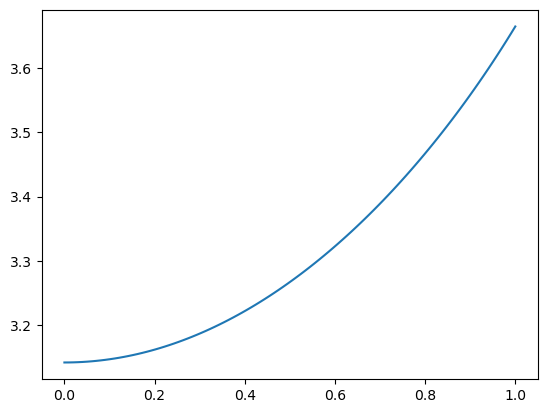

In [108]:
# I'm takinf a sympy exspression, turning it in a numerical function
# then i can plot it
# let's make an array for x
x_num = np.linspace(0,1,100)
# let's fix y to 2
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

For multivariable expressions, can also substitute values in

In [109]:
F

x**2 + y*sin(z)

In [110]:
# I'm sobstituting smp.cos(z)in y and y in z
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

# Examples

A falling object (with an initial velocity)encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [18]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Define expressions

In [19]:
#I use a symbolic object also for 1/2 
# I could have used 1/2 but I don't want to go numerical yet 
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
# I can also define the derivative
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
# I can also define the derivative
dhpdt = vp + q*t

In [20]:
h0t

-g*t**2/2 + h_0 - t*v_0

In [21]:
dhpdt

q*t + v_p

Define equations

In [22]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

Solve the equations

In [23]:
# I can solve for the two unknown t and v0 
# I watn to find the time and the velocity when the object and the platform meet at the same speed 
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [120]:
# the solution is a tuple with two elements (solution for t and solution for v)
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [121]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [122]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

**What is the velocity when they collide?**

In [123]:
# I substitute t_collide in t and v_initfall in v0
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [124]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

# Let's take a look calculus with sympy

In [125]:
x = smp.symbols('x')

## Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [128]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [129]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

You can also do derivative of abstract function
$$\frac{d}{dx} f(x+g(x)) $$

In [24]:
# I give an extra parameter cls=smpt.Function
f, g = smp.symbols('f g', cls=smp.Function)
f
g

g

In [25]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [26]:
f

f(x + g(x))

In [27]:
# I can not differentiate this function
dfdx = smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [28]:
# let's now substitute the generic function g with sin(x)
dfdx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [30]:
# need to call doit to actually do the derivative
dfdx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [31]:
dfdx.subs([(g, smp.sin(x))]).doit() 

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Basic Antiderivatives

$$ \int \csc(x) \cot (x)  dx $$

In [32]:
# there is not a + c in the result, but you actually need to add it 
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

## Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [33]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

This is a quite complicate integral that can be solved (separating by part several times)
That is actually easy with sympy
$$\int_1^t x^{10} e^x dx $$

In [34]:
t= smp.symbols('t')

In [35]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Examples

The hydrogen wave function is given by

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

a is the bohr radius

n,l,m are the quantum numbers 

L is the laguerre polynomial

The mean distance from the nucleus of the electron:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

The standard deviation in the distance from the nucleus of the electron:

$$\sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2}$$

In [36]:
from sympy import assoc_laguerre

In [40]:
assoc_laguerre?

Define variables, be sure to specify their attributes

In [41]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

Define $R_{nl}(r)$

In [42]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

We can check to make sure this corresponds to the radial wavefunctions we expect. Lets see $R_{10}(r)$

In [157]:
#I will check that the exspression is correct looking at the 
# ground state and compare with tables values
R_10 = R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

Function to compute $\int_{0}^{\infty} R_{nl}^2 r^k dr$ for particular values of $n$, $l$ and $k$

In [43]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

Compute the mean radial distance of an electron in the state $\psi_{100}$

In [44]:
compute_int(n_val=1,l_val=0,k=3)

3*a/2

Compute the spread $\sigma$ in distances of the electron in state $\psi_{100}$

In [160]:
smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

sqrt(3)*a/2

Compute the mean radial distance of an electron in the state $\psi_{420}$

In [161]:
compute_int(n_val=1,l_val=0,k=3)

3*a/2

In [162]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [163]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

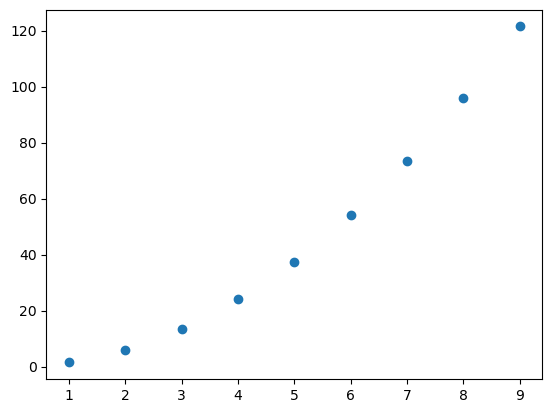

In [164]:
plt.scatter(ns, ds)